In [9]:
# 01_eda.ipynb — EDA for Drilldown case
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path

# show more columns
pd.set_option("display.max_columns", 100)

DATA = Path("../data")  # adjust if your notebook sits elsewhere


In [12]:
companies      = pd.read_csv(DATA / "companies.csv")
contacts       = pd.read_csv(DATA / "contacts.csv")
deals          = pd.read_csv(DATA / "deals.csv")
invoices       = pd.read_csv(DATA / "invoices.csv")
invoice_lines  = pd.read_csv(DATA / "invoice_lines.csv")
products       = pd.read_csv(DATA / "products.csv")

tables = {
    "companies": companies,
    "contacts": contacts,
    "deals": deals,
    "invoices": invoices,
    "invoice_lines": invoice_lines,
    "products": products,
}

{name: df.shape for name, df in tables.items()}


{'companies': (100, 8),
 'contacts': (100, 8),
 'deals': (94, 8),
 'invoices': (67, 8),
 'invoice_lines': (134, 8),
 'products': (8, 5)}

In [13]:
for name, df in tables.items():
    print(f"\n=== {name} === ({df.shape[0]} rows, {df.shape[1]} cols)")
    display(df.head(3))



=== companies === (100 rows, 8 cols)


,company_id,company_name,industry,annual_revenue,employee_count,country,created_date,owner_id
0,1,Innovate Solutions,Software,5500000,250,Netherlands,2023-01-15,101
1,2,Quantum Manufacturing,Manufacturing,12000000,800,Germany,2023-02-20,102
2,3,Apex Retail Group,Retail,8200000,450,USA,2023-03-10,101



=== contacts === (100 rows, 8 cols)


,contact_id,company_id,first_name,last_name,email,job_title,lead_source,created_date
0,201,1,Anna,Devries,anna.devries@innovatesolutions.com,CTO,Webinar,2023-01-20
1,202,1,Ben,Jansen,ben.jansen@innovatesolutions.com,IT Manager,Organic Search,2023-02-10
2,203,2,Klaus,Schmidt,klaus.schmidt@quantummanufacturing.de,Operations Director,Trade Show,2023-02-25



=== deals === (94 rows, 8 cols)


,deal_id,deal_name,company_id,amount,deal_stage,close_date,created_date,owner_id
0,1001,Innovate CRM Upgrade Q2,1,25000,Closed Won,2023-05-15,2023-03-01,101
1,1002,Quantum Mfg. Analytics Platform,2,50000,Closed Won,2023-06-20,2023-04-10,102
2,1003,Apex Retail Marketing Suite,3,18000,Closed Lost,2023-07-01,2023-05-05,101



=== invoices === (67 rows, 8 cols)


,invoice_id,company_id,deal_id,invoice_date,due_date,total_amount,status,paid_date
0,9001,1,1001,2023-05-20,2023-06-19,25000,Paid,2023-06-15
1,9002,2,1002,2023-06-25,2023-07-25,50000,Paid,2023-07-20
2,9003,4,1004,2023-08-15,2023-09-14,30000,Paid,2023-09-01



=== invoice_lines === (134 rows, 8 cols)


,invoice_line_id,invoice_id,product_id,quantity,unit_price,line_total,Unnamed: 6,Unnamed: 7
0,1,9001,502,10,2500,25000.0,NaN,NaN
1,2,9002,503,10,4000,40000.0,NaN,NaN
2,3,9002,504,2,5000,10000.0,NaN,NaN



=== products === (8 rows, 5 cols)


,product_id,product_name,description,unit_price,category
0,501,Standard CRM License,Per-seat license for our standard CRM software.,1500,Software License
1,502,Premium CRM License,Per-seat license with advanced analytics and s...,2500,Software License
2,503,Data Analytics Suite,Cloud-based data analytics platform subscription.,4000,Software Subscription


In [14]:
def null_report(df):
    s = df.isna().sum()
    pct = (s / len(df) * 100).round(2)
    out = pd.DataFrame({"nulls": s, "pct": pct})
    return out[out["nulls"] > 0].sort_values("pct", ascending=False)

for name, df in tables.items():
    print(f"\n--- NULLS: {name} ---")
    display(null_report(df))



--- NULLS: companies ---


,nulls,pct



--- NULLS: contacts ---


,nulls,pct



--- NULLS: deals ---


,nulls,pct



--- NULLS: invoices ---


,nulls,pct
paid_date,13,19.4



--- NULLS: invoice_lines ---


,nulls,pct
Unnamed: 6,132,98.51
Unnamed: 7,132,98.51
line_total,1,0.75



--- NULLS: products ---


,nulls,pct


In [17]:
checks = {
    "companies.company_id": (companies, "company_id"),
    "contacts.contact_id": (contacts, "contact_id"),
    "contacts.company_id": (contacts, "company_id"),
    "deals.deal_id": (deals, "deal_id"),
    "deals.company_id": (deals, "company_id"),
    "invoices.invoice_id": (invoices, "invoice_id"),
    "invoices.deal_id": (invoices, "deal_id"),
    "invoice_lines.invoice_line_id": (invoice_lines, "invoice_line_id"),
    "invoice_lines.invoice_id": (invoice_lines, "invoice_id"),
    "invoice_lines.product_id": (invoice_lines, "product_id"),
    "products.product_id": (products, "product_id"),
}

rows = []
for name, (df, col) in checks.items():
    rows.append({
        "table.col": name,
        "rows": len(df),
        "unique": df[col].nunique(),
        "nulls": df[col].isna().sum(),
        "dupes": len(df) - df.drop_duplicates(subset=[col]).shape[0]
    })
pd.DataFrame(rows).sort_values("table.col")


,table.col,rows,unique,nulls,dupes
0,companies.company_id,100,100,0,0
2,contacts.company_id,100,98,0,2
1,contacts.contact_id,100,100,0,0
4,deals.company_id,94,93,0,1
3,deals.deal_id,94,94,0,0
8,invoice_lines.invoice_id,134,70,0,64
7,invoice_lines.invoice_line_id,134,132,0,2
9,invoice_lines.product_id,134,11,0,123
6,invoices.deal_id,67,66,0,1
5,invoices.invoice_id,67,67,0,0


In [18]:
# contacts → companies
orph_contacts_comp = contacts.merge(companies[["company_id"]], on="company_id", how="left", indicator=True)
print("Contacts with missing company_id match:", (orph_contacts_comp["_merge"] == "left_only").sum())

# invoices → deals, companies
orph_invoices_deals = invoices.merge(deals[["deal_id"]], on="deal_id", how="left", indicator=True)
print("Invoices with missing deal_id match:", (orph_invoices_deals["_merge"] == "left_only").sum())

# invoice_lines → invoices, products
orph_lines_invoices = invoice_lines.merge(invoices[["invoice_id"]], on="invoice_id", how="left", indicator=True)
orph_lines_products = invoice_lines.merge(products[["product_id"]], on="product_id", how="left", indicator=True)
print("Invoice_lines with missing invoice match:", (orph_lines_invoices["_merge"] == "left_only").sum())
print("Invoice_lines with missing product match:", (orph_lines_products["_merge"] == "left_only").sum())


Contacts with missing company_id match: 0
Invoices with missing deal_id match: 0
Invoice_lines with missing invoice match: 3
Invoice_lines with missing product match: 3


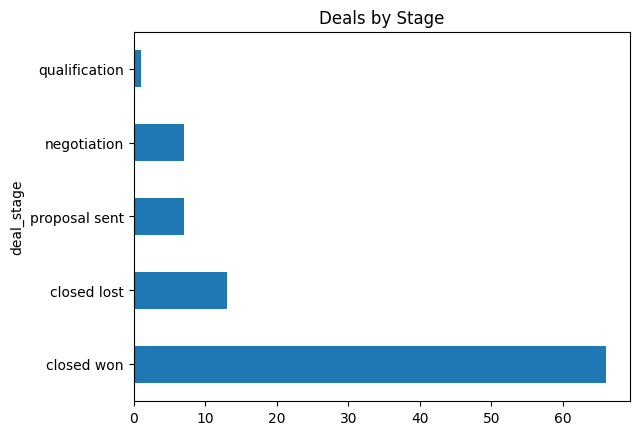

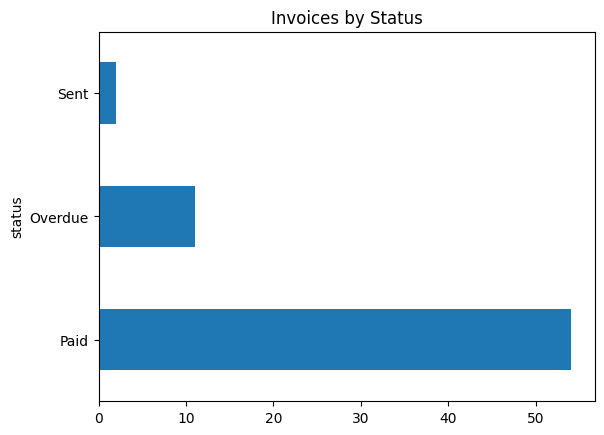

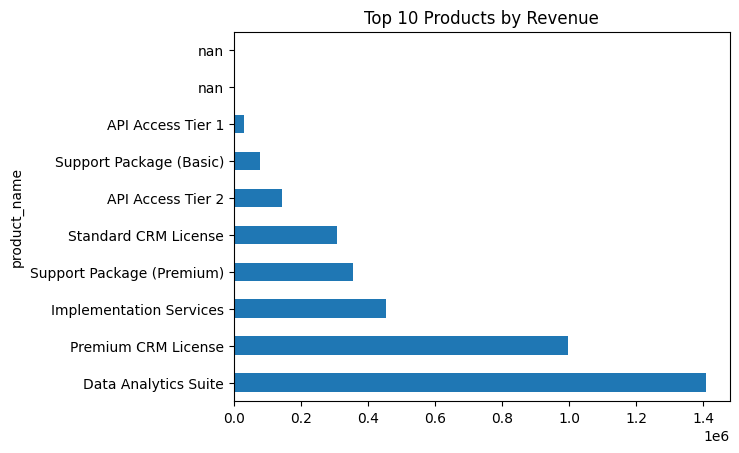

In [19]:
# 1) Deals by stage
plt.figure()
deals["deal_stage"].str.lower().value_counts().plot(kind="barh", title="Deals by Stage")
plt.show()

# 2) Invoice status
plt.figure()
invoices["status"].str.title().value_counts().plot(kind="barh", title="Invoices by Status")
plt.show()

# 3) Revenue by product (top 10)
lines_rev = invoice_lines.groupby("product_id")["line_total"].sum().sort_values(ascending=False)
top10 = lines_rev.head(10).reset_index().merge(products[["product_id","product_name"]], on="product_id", how="left")
plt.figure()
top10.set_index("product_name")["line_total"].plot(kind="barh", title="Top 10 Products by Revenue")
plt.show()


In [20]:
# ensure dates
for c in ["invoice_date", "due_date", "paid_date"]:
    if c in invoices.columns:
        invoices[c] = pd.to_datetime(invoices[c], errors="coerce")

# Days to pay (only for Paid)
paid = invoices[(invoices["status"].str.lower() == "paid") & invoices["paid_date"].notna()]
paid["days_to_pay"] = (paid["paid_date"] - paid["invoice_date"]).dt.days
dso = paid["days_to_pay"].mean()
print("Average days to pay (Paid invoices):", round(dso, 2))

# Overdue / Open exposure
overdue_amt = invoices.loc[invoices["status"].str.lower() == "overdue", "total_amount"].sum()
open_amt    = invoices.loc[invoices["status"].str.lower() == "sent", "total_amount"].sum()
print("Overdue amount:", overdue_amt, " | Open amount:", open_amt)

# By company (top 10 overdue)
overdue_by_company = invoices.loc[invoices["status"].str.lower()=="overdue"].groupby("company_id")["total_amount"].sum().sort_values(ascending=False).head(10)
display(overdue_by_company)


Average days to pay (Paid invoices): 25.28
Overdue amount: 470000  | Open amount: 41000


/var/folders/wc/wpc2_w2s73z_8qr0dbq576x00000gn/T/ipykernel_41457/3480067644.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  paid["days_to_pay"] = (paid["paid_date"] - paid["invoice_date"]).dt.days


company_id
29    110000
13     60000
72     58000
45     55000
1      40000
58     37000
95     36000
73     24000
30     18000
87     17000
Name: total_amount, dtype: int64

In [21]:
# Realized revenue via invoice_lines
rev_by_company = invoice_lines.groupby("invoice_id")["line_total"].sum().reset_index(name="invoice_line_sum") \
    .merge(invoices[["invoice_id","company_id","status","invoice_date"]], on="invoice_id", how="left")

rev_by_company = rev_by_company.groupby("company_id")["invoice_line_sum"].sum().sort_values(ascending=False)
display(rev_by_company.head(10))


company_id
55.0    280000.0
22.0    250000.0
35.0    220000.0
42.0    180000.0
20.0    150000.0
13.0    120000.0
61.0    115000.0
29.0    110000.0
67.0     95000.0
32.0     95000.0
Name: invoice_line_sum, dtype: float64

In [22]:
notes = []

# missingness
for name, df in tables.items():
    n_null_cols = (df.isna().sum() > 0).sum()
    if n_null_cols:
        notes.append(f"{name}: {n_null_cols} columns contain nulls.")

# integrity
notes.append(f"Contacts without company match: {(orph_contacts_comp['_merge']=='left_only').sum()}")
notes.append(f"Invoice lines without invoice match: {(orph_lines_invoices['_merge']=='left_only').sum()}")
notes.append(f"Invoice lines without product match: {(orph_lines_products['_merge']=='left_only').sum()}")

# distributions
top_stage = deals['deal_stage'].str.lower().value_counts().idxmax()
notes.append(f"Most common deal stage: {top_stage}")

# DSO + exposure
notes.append(f"Avg days to pay (paid only): {round(dso,2)}")
notes.append(f"Overdue exposure: {overdue_amt}; Open (sent) exposure: {open_amt}")

# top products
notes.append(f"Top product by revenue: {top10.loc[top10['line_total'].idxmax(), 'product_name']}")

for n in notes:
    print("-", n)


- invoices: 1 columns contain nulls.
- invoice_lines: 3 columns contain nulls.
- Contacts without company match: 0
- Invoice lines without invoice match: 3
- Invoice lines without product match: 3
- Most common deal stage: closed won
- Avg days to pay (paid only): 25.28
- Overdue exposure: 470000; Open (sent) exposure: 41000
- Top product by revenue: Data Analytics Suite
